In [30]:
#importer les librairies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [31]:
data = pd.read_csv('advertising.xls') #charger database 


In [32]:
data.head(5) #Q2

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [33]:
data.tail(5)            ########## Q3

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [34]:
k = data.columns        ########### Q4
s = data.shape
print("nombre des lignes : ",s[0])
print("y'a ",s[1]," colonnes : ")
for i in k :
    print('    ',i)


nombre des lignes :  200
y'a  4  colonnes : 
     TV
     Radio
     Newspaper
     Sales


In [35]:
if data.isnull().values.any() :  ########### Q5
    print("dataset contient des valeurs NULL")
else : print("dataset ne contient pas des valeurs NULL")


dataset ne contient pas des valeurs NULL


In [36]:
k = data[(data['TV']<20)]  ########### Q6
print ("Nombre de Ventes qui fais moins de 20 : ",k['Sales'].count()) 

Nombre de Ventes qui fais moins de 20 :  19


In [37]:
vente = data[['Sales']]         ########### Q7
vente['Sales'].max()
print("Le plus grand nombre de Ventes : ",vente['Sales'].max())
print("Le plus petit nombre de Ventes : ",vente['Sales'].min())

Le plus grand nombre de Ventes :  27.0
Le plus petit nombre de Ventes :  1.6


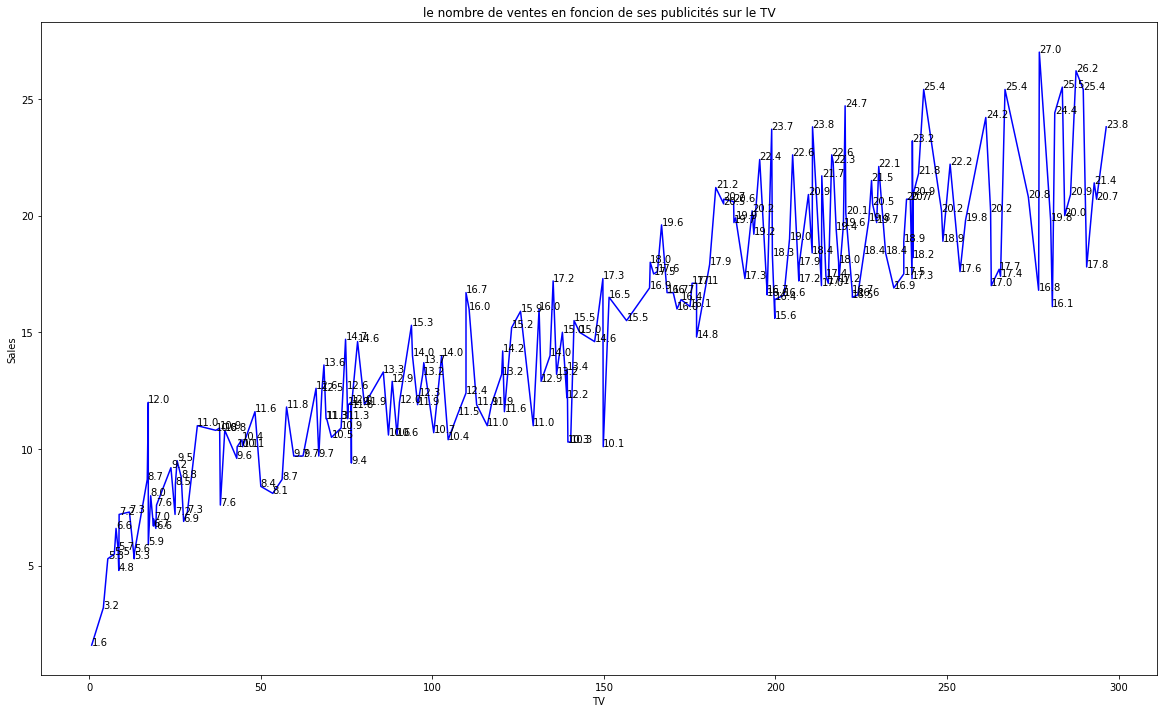

In [38]:
data_sorted = data.sort_values(by = 'TV') ########### Q8
X=data_sorted['TV']
Y=data_sorted['Sales']

plt.figure(figsize=(20, 12))
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('le nombre de ventes en foncion de ses publicités sur le TV')

plt.plot(X,Y,'b-')
k=data['Sales']
for i, label in enumerate(k):
    plt.annotate(label, (X[i], Y[i]))

In [52]:
from sklearn.linear_model import LinearRegression   ########### Q9
from sklearn.model_selection import train_test_split

X = data[['TV']]
Y = data[['Sales']]

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2,random_state=20)

Model = LinearRegression().fit(x_train,y_train) 

In [53]:
from sklearn import metrics                          ########### Q10

pred = Model.predict(x_test)

print(" MAE : ",metrics.mean_absolute_error(y_test,pred))
print(" MSE : ",metrics.mean_squared_error(y_test,pred))
print("RMSE : ",np.sqrt(metrics.mean_squared_error(y_test,pred)))

 MAE :  2.00552054903782
 MSE :  6.725018336762924
RMSE :  2.5932640314404787


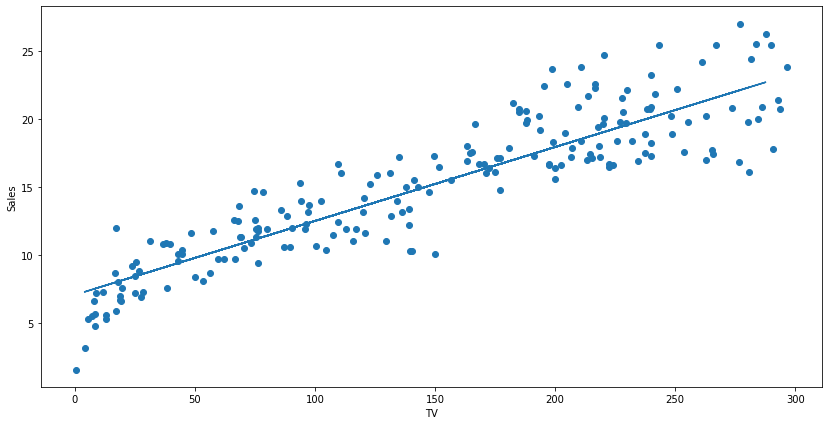

In [54]:
pre = Model.predict(x_test)                          ########### Q11
plt.figure(figsize=(14, 7))
plt.xlabel('TV')
plt.ylabel('Sales')
plt.scatter(data['TV'],data['Sales'])
plt.plot(x_test,pre)

In [88]:
a = pd.DataFrame(['20'])                             ########### Q12
k = Model.predict(a)                  
print("Nombre de Ventes en cas de 20 Pubs : ",k[0,0])

Nombre de Ventes en cas de 20 Pubs :  8.164871424018703


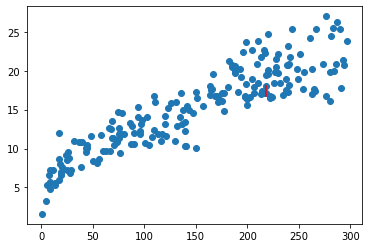

In [123]:

m = 0
c = 0
X = data.iloc[:,0]
Y = data.iloc[:,3]
L = 0.00001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    
    Y_pred = m*X + c  # The current predicted value of Y
    
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c

Y_pred = m*X + c
plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line